In [219]:
# Edwin Peter
# 177019

# Sigmoid

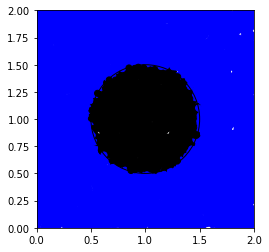

In [67]:
import matplotlib.patches as patches
import matplotlib.path as path
import math

#Generate random points
numberOfPoints = 10000
randompoints = np.random.rand(numberOfPoints,2)*2
xcor = randompoints[:,0]
ycor = randompoints[:,1]
#Create circle parameter
radius = 0.5
centre = (1,1)
upperlimit = centre[0] + radius
lowerlimit = centre[0] - radius

circledatainput = np.zeros(shape=(len(xcor),2))
circledataoutput = np.zeros(shape=(len(xcor),1))

for i,j,count in zip(xcor,ycor, range(len(xcor))):
    dist = math.sqrt((centre[0] - i) ** 2 + (centre[1] - j) ** 2)
    circledatainput[count] = i,j
    if (dist<=radius):
        circledataoutput[count] = 1
    else:
        circledataoutput[count] = 0

circledatainput = np.asarray(circledatainput)
circledataoutput = np.asarray(circledataoutput)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Circle(centre, radius, fill= False))
plt.ylim([0,2])
plt.xlim([0,2])
plt.scatter(circledatainput[:,0],circledatainput[:,1],color=['black' if i==1 else 'blue' for i in circledataoutput])
plt.show()

In [68]:
x = circledatainput
y = circledataoutput

# Parameters
learning_rate = 0.1
num_steps = 1000

In [74]:
# Network Parameters
n_hidden_1 = 3 # 1st layer number of neurons
n_hidden_2 = 3 # 2nd layer number of neurons
num_input = x.shape[1]
num_classes = y.shape[1]

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])

w1 = tf.Variable(tf.random_normal([num_input, n_hidden_1]))
b1 = tf.Variable(tf.zeros([n_hidden_1]))

w2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
b2 = tf.Variable(tf.zeros([n_hidden_2]))

w3 = tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
b3 = tf.Variable(tf.zeros([num_classes]))

In [75]:
# Create model
hidden_layer1 = tf.nn.sigmoid(tf.matmul(X, w1) + b1) 
hidden_layer2 = tf.nn.sigmoid(tf.matmul(hidden_layer1, w2) + b2) 
out_layer = tf.nn.sigmoid(tf.matmul(hidden_layer2, w3) + b3) 

In [78]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.reduce_sum((y-out_layer)**2))

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(out_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables
init = tf.global_variables_initializer()

layer1grads = []
layer2grads = []
layer3grads = []

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        train, error, W1, W2, W3, B1, B2,B3 = sess.run([train_op, loss_op, w1, w2,w3, b1,b2,b3], feed_dict={X: x, Y: y})
        layer1grads.append(W1[0,0])
        layer2grads.append(W2[0,0])
        layer3grads.append(W3[0,0])

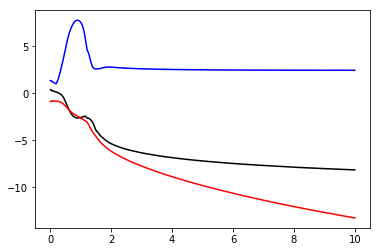

In [79]:
randompoints = np.linspace(0,10,num_steps)


plt.plot(randompoints, layer1grads, color = 'blue')
plt.plot(randompoints, layer2grads, color = 'black')
plt.plot(randompoints, layer3grads, color = 'red')
plt.show()

# Relu

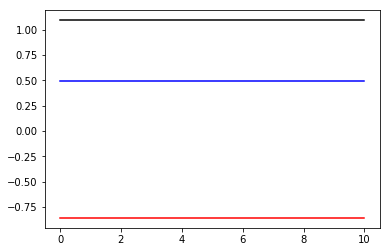

In [80]:
# Create model
hidden_layer1 = tf.nn.relu(tf.matmul(X, w1) + b1) 
hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, w2) + b2) 
out_layer = tf.nn.relu(tf.matmul(hidden_layer2, w3) + b3) 

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.reduce_sum((y-out_layer)**2))

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(out_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables
init = tf.global_variables_initializer()

layer1grads = []
layer2grads = []
layer3grads = []

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        train, error, W1, W2, W3, B1, B2,B3 = sess.run([train_op, loss_op, w1, w2,w3, b1,b2,b3], feed_dict={X: x, Y: y})
        layer1grads.append(W1[0,0])
        layer2grads.append(W2[0,0])
        layer3grads.append(W3[0,0])
        
randompoints = np.linspace(0,10,num_steps)
plt.plot(randompoints, layer1grads, color = 'blue')
plt.plot(randompoints, layer2grads, color = 'black')
plt.plot(randompoints, layer3grads, color = 'red')
plt.show()

# Tanh

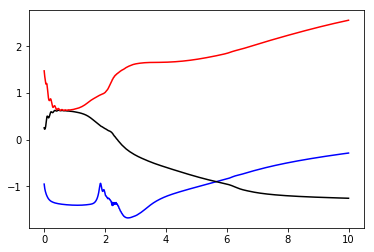

In [81]:
# Create model
hidden_layer1 = tf.nn.tanh(tf.matmul(X, w1) + b1) 
hidden_layer2 = tf.nn.tanh(tf.matmul(hidden_layer1, w2) + b2) 
out_layer = tf.nn.tanh(tf.matmul(hidden_layer2, w3) + b3) 

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.reduce_sum((y-out_layer)**2))

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(out_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables
init = tf.global_variables_initializer()

layer1grads = []
layer2grads = []
layer3grads = []

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        train, error, W1, W2, W3, B1, B2,B3 = sess.run([train_op, loss_op, w1, w2,w3, b1,b2,b3], feed_dict={X: x, Y: y})
        layer1grads.append(W1[0,0])
        layer2grads.append(W2[0,0])
        layer3grads.append(W3[0,0])
        
randompoints = np.linspace(0,10,num_steps)
plt.plot(randompoints, layer1grads, color = 'blue')
plt.plot(randompoints, layer2grads, color = 'black')
plt.plot(randompoints, layer3grads, color = 'red')
plt.show()